In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

## <font color="darkblue"> **Análisis para Péndulo 1**

In [ ]:
#Read pandas data frame
df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQRYu2bPJhZ6OVCvtYfr8t0M-2JW9afSdsy-wa0X7NA6Gxjyv5WCgOieTacj_N67xxHI6572fJ8HWkf/pub?gid=0&single=true&output=csv")

HTTPError: ignored

In [ ]:
type(df["Angulo"].iloc[0]) #Ntotese qeu es tipo string

numpy.float64

In [ ]:
df['Angulo'] = np.deg2rad(df['Angulo'])
df.head()

,Tiempo [ms],Angulo,Tiempo [s],Tiempo_1 [ms],Vel_ang [deg/s],Tiempo_1[s]
0,2617,1.406735,2.6,2250,267.44,2.25
1,2650,1.422443,2.7,2283,577.44,2.28
2,2683,1.406735,2.7,2317,778.77,2.32
3,2717,1.359611,2.7,2350,723.45,2.35
4,2750,1.284562,2.8,2383,518.74,2.38


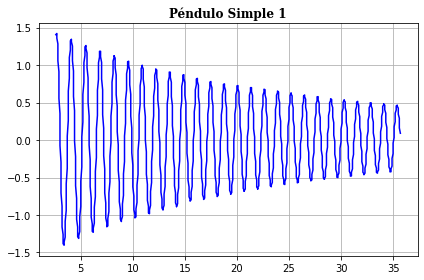

In [ ]:
plt.figure()
p11 = plt.plot(df['Tiempo [s]'], df['Angulo'], "b")
# plt.xlabel("Tiempo [ms]", fontdict={'family': 'serif'})
# plt.ylabel("Ángulo $\\theta$ [rad]" , fontdict={'family': 'serif'})
plt.title("Péndulo Simple 1", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P11.jpg")

## <font color="darkblue"> **Transformada de Fourier**

In [ ]:
tf = fft(df['Angulo'].values)

In [ ]:
T = 33E-3
N = len(df['Tiempo [ms]'])
xf = fftfreq(N, T)[:N//2]

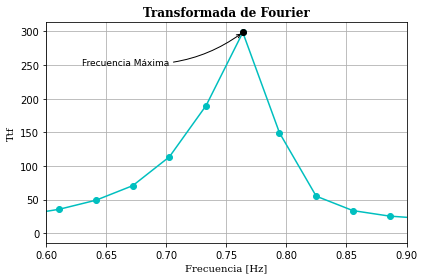

In [ ]:
plt.plot(xf[1:N//2], np.abs(tf[1:N//2]),"co-")
plt.xlim(0.6, 0.9)
plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
plt.ylabel("Ttf", fontdict={'family': 'serif'})
plt.title("Transformada de Fourier", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
px = 0.763685239491691
py =  np.max(np.abs(tf[1:N//2]))
punto = plt.plot([px], [py], "ko")


nota = plt.annotate("Frecuencia Máxima", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (0.63, 250), 
                    fontsize = 9, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P12.jpg")

### <font color = "darkblue"> **Interpolación por Polinomio Cúbico:** </font> Otra forma del calculo de máximo de la frecuencia.

In [ ]:
from scipy.interpolate import CubicSpline
#Se realiza una interpolacion de la función para 
#encontrar el maximo de forma automática, la función que se emplea es Cubic spline
cs = CubicSpline(xf[1:N//2], np.abs(tf[1:N//2]))

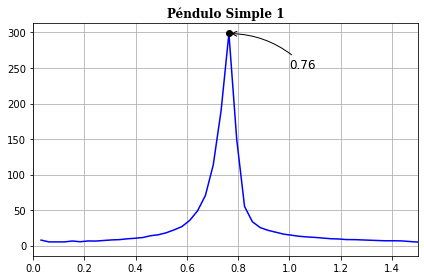

In [ ]:
p12 = plt.plot(abs(xf[1:N//2]),abs(cs(xf[1:N//2])),"b" ) 
plt.xlim(0, 1.5)
# plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
# plt.ylabel("Ttf", fontdict={'family': 'serif'})
plt.grid()
plt.title("Péndulo Simple 1",
          fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
px = 0.763685239491691
py =  np.max(np.abs(tf[1:N//2]))
punto = plt.plot([px], [py], "ko")

nota = plt.annotate("0.76", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (1, 250), 
                    fontsize = 12, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P12.jpg")

In [ ]:
from scipy import optimize
"""
Construimos una nueva función con los valores negativos, dado que 
la libreria fminpowell permite determinar minimos. Entonces para encontrar
el maximo de la función, tomamos los valores invertididos y encontramos el minumo.
"""
cs = CubicSpline(xf[1:N//2], -np.abs(tf[1:N//2]))
min = optimize.fmin_powell(cs, 0.2)


Optimization terminated successfully.
         Current function value: -299.121616
         Iterations: 2
         Function evaluations: 43


In [ ]:
print("El valor maximo de la funcion es:", abs(cs(min)))

El valor maximo de la funcion es: 299.12161557702956


In [ ]:
np.max(np.abs(tf[1:N//2]))

298.6084073711036

In [ ]:
index_max = np.argmax(np.abs(tf[1:N//2]))

In [ ]:
frecuencia = xf[1:N//2][24]
print(frecuencia)
print(1/frecuencia)
a=0.76*np.pi


0.763685239491691
1.3094400000000002


In [ ]:
omega = 2 * np.pi * frecuencia
omega

4.798375876084116

In [ ]:
b = 0.034

### <font color = "darkblue"> **Ajuste del Modelo y Datos Experimentales** </font>  

In [ ]:
# Fit 
def func(t, A,  omega , fi, b, m ):
  return  A * np.cos(omega * t + fi)* np.exp(-b / (2 * m) * t) # Función Movimiento Armónico


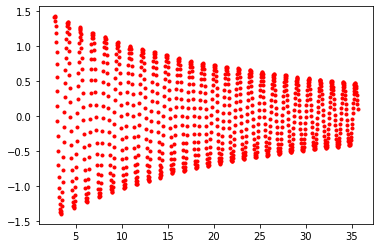

In [ ]:
plt.plot(df["Tiempo [s]"], df["Angulo"],"r.")

In [ ]:
popt, cov =  optimize.curve_fit(func, df["Tiempo [s]"].iloc[150:], df["Angulo"].iloc[150:] )
cov

array([[ 1.93813989e-03,  9.09795557e-07, -2.09405414e-05,
         2.67538707e+02,  3.71230982e+03],
       [ 9.09795551e-07,  2.85578941e-06, -4.92208011e-05,
        -1.87702075e-01, -2.60451144e+00],
       [-2.09405409e-05, -4.92208011e-05,  1.00166112e-03,
         1.85410667e+01,  2.57271700e+02],
       [ 2.67538788e+02, -1.87702053e-01,  1.85410661e+01,
         3.81924678e+09,  5.29950195e+10],
       [ 3.71231094e+03, -2.60451113e+00,  2.57271692e+02,
         5.29950195e+10,  7.35347114e+11]])

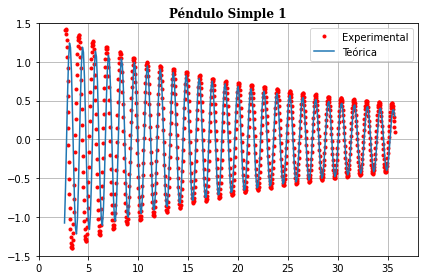

In [ ]:
 
plt.plot(df["Tiempo [s]"], df["Angulo"],  "r.")
plt.plot( df["Tiempo [s]"], func(df["Tiempo [s]"], *popt))
plt.xlim(0,38)
plt.ylim(-1.5,1.5)
plt.grid(True)
plt.title("Péndulo Simple 1",  fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
# plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})
# plt.ylabel("Ángulo $\\theta$ [rad]", fontdict={'family': 'serif'})
plt.legend(("Experimental" ,"Teórica"), prop = {"size":10}, loc="upper right")
plt.tight_layout()
plt.savefig("Gráficas_P13.jpg")

### <font color="darkblue"> **Varias Gráficas**

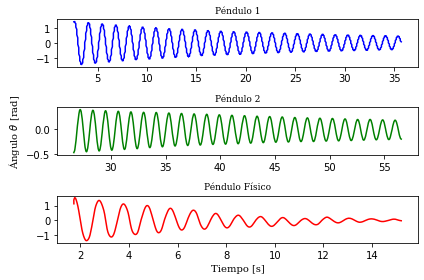

In [ ]:
# Figura con una fila y tres columnas, activo primer subgráfico
plt.subplot(311)
p11, = plt.plot(df['Tiempo [s]'], df['Angulo'], "b")
plt.title("Péndulo 1", fontdict={'family': 'serif', 'size': 9})

# Figura con una fila y tres columnas, activo segundo subgráfico
plt.subplot(312)
p21, = plt.plot(df2['Tiempo [s]'], df2['Angulo'], "g")
# Etiqueta del eje X, que es común para todas
plt.title("Péndulo 2", fontdict={'family': 'serif', 'size': 9})
plt.ylabel("Ángulo $\\theta$ [rad]" , fontdict={'family': 'serif'})

# Figura con una fila y tres columnas, activo tercer subgráfico
plt.subplot(313)
p31, = plt.plot(df3['Tiempo [s]'], df3['Angulo'], "r" )
plt.title("Péndulo Físico", fontdict={'family': 'serif', 'size': 9})
plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})

plt.tight_layout()
plt.savefig("Gráficas_1.jpg")


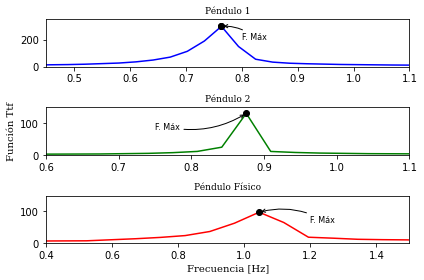

In [ ]:
# Figura con una fila y tres columnas, activo primer subgráfico
plt.subplot(311)
p12, = plt.plot(abs(xf[1:N//2]),abs(cs(xf[1:N//2])),"b" )
plt.title("Péndulo 1", fontdict={'family': 'serif', 'size': 9})
plt.xlim(0.45,1.1)
plt.ylim(0,350)
px = 0.763685239491691
py =  np.max(np.abs(tf[1:N//2]))
punto = plt.plot([px], [py], "ko")
px = 0.763685239491691
py =  np.max(np.abs(tf[1:N//2]))
punto = plt.plot([px], [py], "ko")
nota = plt.annotate("F. Máx", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (0.8, 200), 
                    fontsize = 8, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))

# Figura con una fila y tres columnas, activo segundo subgráfico
plt.subplot(312)
p22, = plt.plot(xf2[1:N2//2],abs(cs2(xf2[1:N2//2])), "g" ) 
# Etiqueta del eje X, que es común para todas
plt.title("Péndulo 2", fontdict={'family': 'serif', 'size': 9})
plt.ylabel("Función Ttf" , fontdict={'family': 'serif'})
plt.xlim(0.6,1.1)
plt.ylim(0,150)
px = 0.8754208754208754
py =  np.max(np.abs(tf2[1:N2//2]))
punto = plt.plot([px], [py], "ko")
nota = plt.annotate("F. Máx", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (0.75, 80), 
                    fontsize = 8, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))

# Figura con una fila y tres columnas, activo tercer subgráfico
plt.subplot(313)
p33, = plt.plot(xf3[1:N3//2],cs3(xf3[1:N3//2]), "r" )
plt.title("Péndulo Físico", fontdict={'family': 'serif', 'size': 9})
plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
plt.xlim(0.4, 1.5)
plt.ylim(0,150)
px = 1.0449320794148378
py =  np.max(np.abs(tf3[1:N3//2]))
punto = plt.plot([px], [py], "ko")


nota = plt.annotate("F. Máx", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (1.2, 65), 
                    fontsize = 8, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))

plt.tight_layout()
plt.savefig("Gráficas_2.jpg")

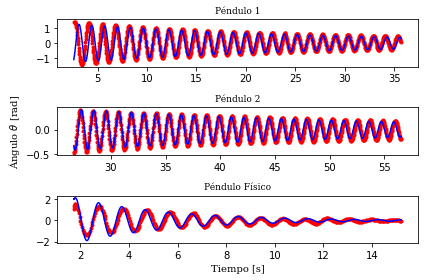

In [ ]:
# Figura con una fila y tres columnas, activo primer subgráfico
plt.subplot(311)
p13, = plt.plot(df["Tiempo [s]"], df["Angulo"],  "r.")
p132 = plt.plot( df["Tiempo [s]"], func(df["Tiempo [s]"], *popt), "b")
plt.title("Péndulo 1", fontdict={'family': 'serif', 'size': 9})

# Figura con una fila y tres columnas, activo segundo subgráfico
plt.subplot(312)
p23, = plt.plot(df2["Tiempo [s]"], df2["Angulo"],"r.")
p232 = plt.plot( df2["Tiempo [s]"], func2(df2["Tiempo [s]"], *popt2), "b")
# Etiqueta del eje X, que es común para todas
plt.title("Péndulo 2", fontdict={'family': 'serif', 'size': 9})
plt.ylabel("Ángulo $\\theta$ [rad]" , fontdict={'family': 'serif'})

# Figura con una fila y tres columnas, activo tercer subgráfico
plt.subplot(313)
p33, = plt.plot(df3["Tiempo [s]"], df3["Angulo"],"r.")
p332 = plt.plot( df3["Tiempo [s]"], func3(df3["Tiempo [s]"], *popt3), "b")
plt.title("Péndulo Físico", fontdict={'family': 'serif', 'size': 9})
plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})

plt.tight_layout()
plt.savefig("Gráficas_3.jpg")

In [ ]:
  A,  omega , fi, b, m = popt

In [ ]:
np.rad2deg(A)

80.43944547699562

In [ ]:
T = 2 * np.pi / omega
T

-1.2970673865293205

\begin{equation}
\omega = \sqrt{\frac{g}{L} -\frac{b^2}{4m^2}}
\end{equation}


\begin{equation}
g = \left( \omega^2 + \frac{b^2}{4m^2} \right)
\end{equation}

In [ ]:
 (omega ** 2 + b ** 2 / (4 * m ** 2)) * 0.36

8.448141678990567

In [ ]:
fi 

46.58364700043983

In [ ]:
np.rad2deg(fi)

2669.0463674524594

In [ ]:
N = (np.rad2deg(fi)) / 360 
N  

7.414017687367943

In [ ]:
7 * 360 


2520

In [ ]:
2669.0463674524594 - 2520 

149.04636745245944

In [ ]:
180 - 149.04636745245944

30.953632547540565

In [ ]:
T = 1/(0.763685239491691)  # Periodo
print(T)

1.3094400000000002


In [ ]:
5/4    # Periodo desde la gráfica

1.25

### <font color="darkblue"> **Ecuación de Movimiento Armónico para Péndulo Simple 1**

\begin{equation}
\theta  = \theta_0 \sin(\omega t + \phi) e^{-bt}
\end{equation}


$b = 0.034$

$\omega=2\pi*f=2\pi*0.76$

$\theta_0 = 81.5$

$\phi = 30.95$






In [ ]:
f = lambda t: theta0 * np.sin(omega * t + phi) * np.exp(-b * t)

In [ ]:
omega= 2 * np.pi * 0.76
phi= np.deg2rad(30.95)
b= 0.034
theta0= np.deg2rad(81.5)
t = np.linspace(1, 30, 1000)

Text(0.5, 1.0, 'Ángulo $\\theta$ Vs. Tiempo')

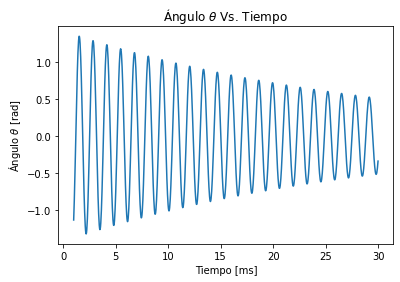

In [ ]:
plt.plot(t, f(t))
plt.xlabel("Tiempo [ms]")
plt.ylabel("Ángulo $\\theta$ [rad]")
plt.title("Ángulo $\\theta$ Vs. Tiempo")

## <font color="darkblue"> **Análisis para Péndulo 2**

In [ ]:
df2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSrRBxkVt64dlbAF2CLm1wQ_8fazxgBRqpbLfilsirKpBTO8q4OHrIh3G_iIuE7_Stbx5OckK7NnIVu/pub?gid=0&single=true&output=csv")

In [ ]:
df2['Angulo'] = np.deg2rad(df2['Angulo'])
df2.head()

,Tiempo [ms],Angulo,Tiempo [s],Tiempo_2 [ms],Vel_ang [⸰/s],Tiempo_2 [s]
0,26611,-0.467399,26.61,26644,31.65,26.64
1,26644,-0.452738,26.64,26678,48.24,26.68
2,26678,-0.430573,26.68,26711,69.29,26.71
3,26711,-0.396713,26.71,26744,89.68,26.74
4,26744,-0.350113,26.74,26778,106.45,26.78


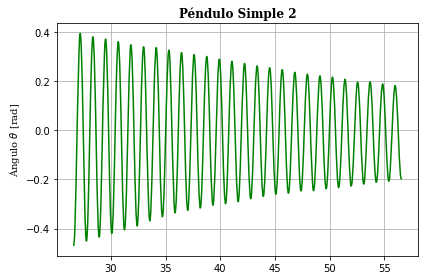

In [ ]:
plt.figure()
p21 = plt.plot(df2['Tiempo [s]'], df2['Angulo'], "g")
# plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})
plt.ylabel("Ángulo $\\theta$ [rad]", fontdict={'family': 'serif'})
plt.title("Péndulo Simple 2", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P21.jpg")

## <font color="darkblue"> **Transformada de Fourier**

In [ ]:
tf2 = fft(df2['Angulo'].values)

In [ ]:
T2 = 33E-3
N2 = len(df2['Tiempo [ms]'])
xf2 = fftfreq(N2, T2)[:N2//2]

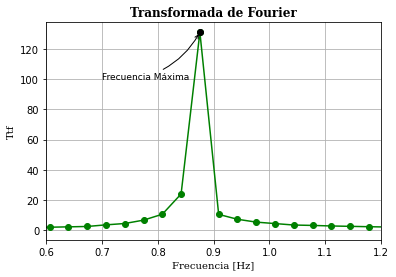

In [ ]:
plt.plot(xf2[1:N2//2], np.abs(tf2[1:N2//2]), "go-" )
plt.xlim(0.6, 1.2)
plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
plt.ylabel("Ttf", fontdict={'family': 'serif'})
plt.title("Transformada de Fourier", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
px = 0.8754208754208754
py =  np.max(np.abs(tf2[1:N2//2]))
punto = plt.plot([px], [py], "ko")


nota = plt.annotate("Frecuencia Máxima", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (0.7, 100), 
                    fontsize = 9, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))
plt.grid(True)

### <font color = "darkblue"> **Interpolación por Polinomio Cúbico:** </font> Otra forma del calculo de máximo de la frecuencia.

In [ ]:
from scipy.interpolate import CubicSpline
cs2 = CubicSpline(xf2[1:N2//2], np.abs(tf2[1:N2//2]))

In [ ]:
from scipy.optimize import curve_fit

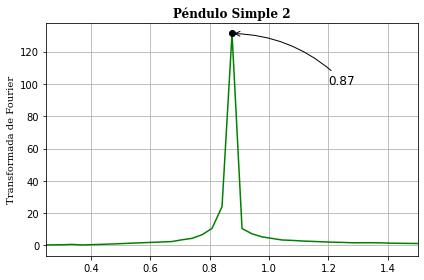

In [ ]:
p22 = plt.plot(xf2[1:N2//2],abs(cs2(xf2[1:N2//2])), "g" ) 
plt.xlim(0.25, 1.5)
# plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
plt.ylabel("Transformada de Fourier", fontdict={'family': 'serif'})
plt.title("Péndulo Simple 2", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
px = 0.8754208754208754
py =  np.max(np.abs(tf2[1:N2//2]))
punto = plt.plot([px], [py], "ko")


nota = plt.annotate("0.87", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (1.2, 100), 
                    fontsize = 12, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))
plt.grid(True)

plt.tight_layout()
plt.savefig("Gráficas_P22.jpg")

In [ ]:
from scipy import optimize 
cs2 =  CubicSpline(xf2[1:N2//2], - np.abs(tf2[1:N2//2]))
min2 = optimize.fmin_powell(cs2, 0.5)

Optimization terminated successfully.
         Current function value: -131.303746
         Iterations: 2
         Function evaluations: 41


In [ ]:
print("El valor maximo de la funcion es:", abs(cs2(min2)))

El valor maximo de la funcion es: 131.30374551789828


In [ ]:
max(np.abs(tf2[1:N2//2])) # Máximo

131.19618445451385

In [ ]:
xf2[1:N2//2][25]  # Frecuencia

0.8754208754208754

In [ ]:
abs(tf2[1:N2//2][25])

131.19618445451385

In [ ]:
index_max2 = np.argmax(np.abs(tf2[1:N2//2]))
index_max2

25

In [ ]:
T2 = 1/(0.8754208754208754)  # Periodo
print(T2)

1.1423076923076922


In [ ]:
5/4    # Periodo desde la gráfica

1.25

In [ ]:
frecuencia2 = xf2[1:N2//2][25]
print(frecuencia2)
print(T2)

0.8754208754208754
1.1423076923076922


In [ ]:
omega2 = 2 * np.pi* frecuencia2
omega2 

5.500431582042736

In [ ]:
b2 = 0.033

### <font color=" darkblue" > **Ajuste del Modelo y Datos Experimentales**

In [ ]:
def func2(t2, A2,  fi2): 
  return A2 * np.cos(omega2 * t2 + fi2) * np.exp(-b2   * t2)

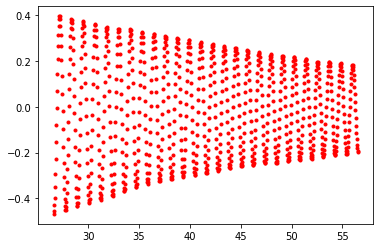

In [ ]:
plt.plot(df2["Tiempo [s]"], df2["Angulo"]," r.")

In [ ]:
popt2, cov2 = optimize.curve_fit(func2, df2["Tiempo [s]"], df2["Angulo"])


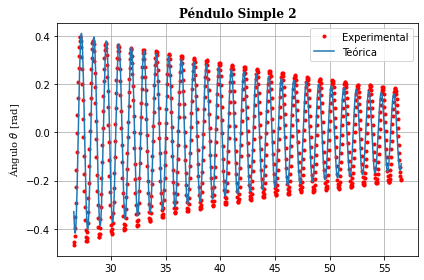

In [ ]:
plt.plot(df2["Tiempo [s]"], df2["Angulo"],"r.")
plt.plot( df2["Tiempo [s]"], func2(df2["Tiempo [s]"], *popt2))
# plt.xlim(20,60)
# plt.ylim(-1,1)
plt.grid(True)
plt.title("Péndulo Simple 2",  fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
# plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})
plt.ylabel("Ángulo $\\theta$ [rad]", fontdict={'family': 'serif'})
plt.legend(("Experimental" ,"Teórica"), prop = {"size":10}, loc="upper right")
plt.tight_layout()
plt.savefig("Gráficas_P23.jpg")

In [ ]:
A2,  fi2  = popt2

In [ ]:
A2

1.0090067933959748

In [ ]:
np.rad2deg(A2)

57.811830761617976

In [ ]:
fi2

0.617387470089267

In [ ]:
np.rad2deg(fi2)

35.373696360374346

In [ ]:
T = 2 * np.pi / omega2
T

1.1423076923076922

\begin{equation}
\omega = \sqrt{\frac{g}{L} -\frac{b^2}{4m^2}}
\end{equation}


\begin{equation}
g = \left( \omega^2 + \frac{b^2}{4m^2} \right)
\end{equation}

In [ ]:
 (omega ** 2 + b ** 2 / (4 * m ** 2)) * 0.33

7.5249461156064115

### <font color="darkblue"> **Ecuación de Movimiento Armónico para Péndulo Simple 2**

\begin{equation}
\theta  = \theta_0 \sin(\omega t + \phi) e^{-bt}
\end{equation}


$b = 0.033$

$\omega=2\pi*f=2\pi*0.87$

$\theta_0 = 26.78$

$\phi = 35.37$


In [ ]:
f2 = lambda t: theta0 * np.sin(omega * t + phi) * np.exp(-b * t)

In [ ]:
omega= 2 * np.pi * 0.87
phi= 35.37
b= 0.033
theta0= np.deg2rad(26.78)
t = np.linspace(1, 30, 1000)

Text(0, 0.5, 'Ángulo $\\theta$ [rad]')

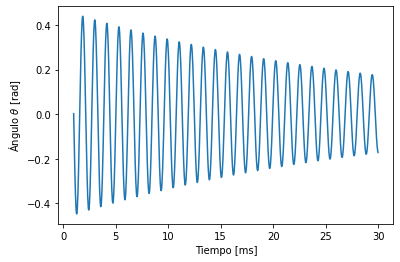

In [ ]:
plt.plot(t, f2(t))
plt.xlabel("Tiempo [ms]")
plt.ylabel("Ángulo $\\theta$ [rad]")

## <font color="darkblue"> **Análisis para Péndulo Físico**

In [ ]:
df3 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSsa0GBSGhkf2FGxpd367pWWGRD7LyJsabiap8_oV-RtJSjry0gOW4rs0PMGj3c22-QfX1lS5jeic6L/pub?gid=0&single=true&output=csv")

In [ ]:
df3['Angulo'] = np.deg2rad(df3['Angulo'])
df3.head()

,Tiempo [ms],Angulo,Tiempo [s],Tiempo [ms].1,Vel_ang [⸰/s],Tiempo [s].1
0,1736,1.125039,1.736,1733,354.71,1.733
1,1733,1.380730,1.733,1767,114.53,1.767
2,1767,1.537810,1.767,1800,-140.55,1.800
3,1800,1.513899,1.800,1833,-283.72,1.833
4,1833,1.374272,1.833,1867,-359.56,1.867


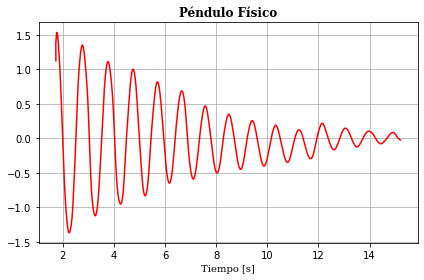

In [ ]:
plt.figure()
p31 = plt.plot(df3['Tiempo [s]'], df3['Angulo'], "r" )
plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})
# plt.ylabel("Ángulo $\\theta$ [rad]", fontdict={'family': 'serif'})
plt.title("Péndulo Físico", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P31.jpg")

## <font color=" darkblue"> **Transformada de Fourier**

In [ ]:
tf3 = fft(df3['Angulo'].values)

In [ ]:
T3 = 33E-3
N3 = len(df3['Tiempo [ms]'])
xf3 = fftfreq(N3, T3)[:N3//2]

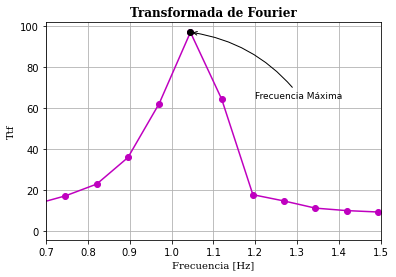

In [ ]:
plt.plot(xf3[1:N3//2], np.abs(tf3[1:N3//2]), "mo-")
plt.xlim(0.7, 1.5)
plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
plt.ylabel("Ttf", fontdict={'family': 'serif'})
plt.title("Transformada de Fourier", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
px = 1.0449320794148378
py =  np.max(np.abs(tf3[1:N3//2]))
punto = plt.plot([px], [py], "ko")


nota = plt.annotate("Frecuencia Máxima", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (1.2, 65), 
                    fontsize = 9, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))
plt.grid(True)

### <font color = "darkblue"> **Interpolación por Polinomio Cúbico:** </font> Otra forma del calculo de máximo de la frecuencia.

In [ ]:
from scipy.interpolate import CubicSpline
cs3 = CubicSpline(xf3[1:N3//2], np.abs(tf3[1:N3//2]))

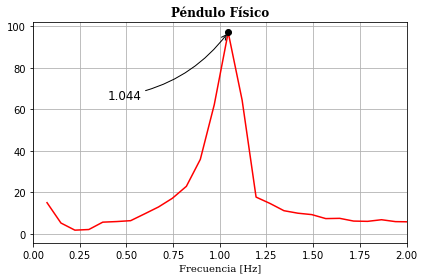

In [ ]:
#Función 
p32 = plt.plot(xf3[1:N3//2],cs3(xf3[1:N3//2]), "r" ) 
plt.xlim(0,2)
plt.xlabel("Frecuencia [Hz]", fontdict={'family': 'serif'})
# plt.ylabel("Ttf", fontdict={'family': 'serif'})
plt.title("Péndulo Físico", fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
px = 1.0449320794148378
py =  np.max(np.abs(tf3[1:N3//2]))
punto = plt.plot([px], [py], "ko")


nota = plt.annotate("1.044", 
                    xy = (px, py), 
                    xycoords = "data", 
                    xytext = (0.4, 65), 
                    fontsize = 12, 
                    arrowprops = dict(arrowstyle = "->", 
                                      connectionstyle = "arc3, rad=.2"))
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P32.jpg")

In [ ]:
max(np.abs(tf3[1:N3//2])) # Máximo

97.02278329466725

In [ ]:
xf3[1:N3//2][13]  # Frecuencia

1.0449320794148378

In [ ]:
abs(tf3[1:N3//2][13])

97.02278329466725

In [ ]:
index_max3 = np.argmax(np.abs(tf3[1:N3 // 2]))
index_max3

13

In [ ]:
frecuencia3 = xf3[1:N3 // 2][13]
print(frecuencia3)
print(T3)

1.0449320794148378
0.033


In [ ]:
T3 = 1/(1.0449320794148378)  # Periodo
print(T3)

0.9570000000000002


In [ ]:
omega3 = 2 * np.pi * frecuencia3
omega3

6.565501888379921

In [ ]:
b3 = 0.261

In [ ]:
2/2    # Periodo desde la gráfica

1.0

### <font color="darkblue"> **Ajuste del Modelo y Datos Experimentales**

In [ ]:
def func3(t3, A3, fi3): 
  return A3 * np.cos(omega3 * t3 + fi3) * np.exp(-b3  * t3 )

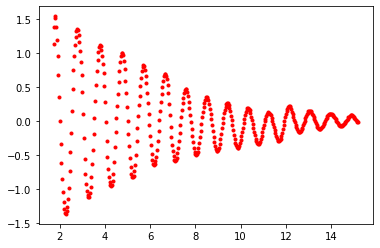

In [ ]:
plt.plot(df3["Tiempo [s]"], df3["Angulo"]," r.")

In [ ]:
popt3, cov3 = optimize.curve_fit(func3, df3["Tiempo [s]"].iloc[150:], df3["Angulo"].iloc[150:])
cov3

array([[1.83860513e-02, 5.81800337e-05],
       [5.81800337e-05, 1.43141544e-03]])

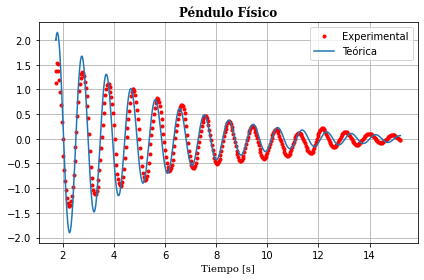

In [ ]:
plt.plot(df3["Tiempo [s]"], df3["Angulo"],"r.")
plt.plot( df3["Tiempo [s]"], func3(df3["Tiempo [s]"], *popt3))
# plt.xlim(20,60)
# plt.ylim(-1,1)
plt.grid(True)
plt.title("Péndulo Físico",  fontdict={'family': 'serif', 
                    'color' : 'black',
                    'weight': 'bold',
                    'size': 12, },
                     loc= "center")
plt.xlabel("Tiempo [s]", fontdict={'family': 'serif'})
# plt.ylabel("Ángulo $\\theta$ [rad]", fontdict={'family': 'serif'})
plt.legend(("Experimental" ,"Teórica"), prop = {"size":10}, loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.savefig("Gráficas_P33.jpg")

In [ ]:
A3, fi3 = popt3

In [ ]:
np.rad2deg(A3)

197.56212816919899

In [ ]:
T = 2 * np.pi / omega3
T

0.9570000000000003

In [ ]:
fi3

0.7601482371684581

In [ ]:
np.rad2deg(fi3)

43.553285794062184

### <font color="darkblue"> **Ecuación de Movimiento Armónico para Péndulo Físico**

\begin{equation}
\theta  = \theta_0 \sin(\omega t + \phi) e^{-bt}
\end{equation}


$b = 0.261$

$\omega=2\pi*f=2\pi*1.044$

$\theta_0 = 79.11$

$\phi = 43.55$

In [ ]:
f3 = lambda t: theta0 * np.sin(omega * t + phi) * np.exp(-b * t)

In [ ]:
omega= 2 * np.pi * 1.044
phi= 43.55
b= 0.261
theta0= np.deg2rad(79.11)
t = np.linspace(1, 30, 1000)

Text(0, 0.5, 'Ángulo $\\theta$ [rad]')

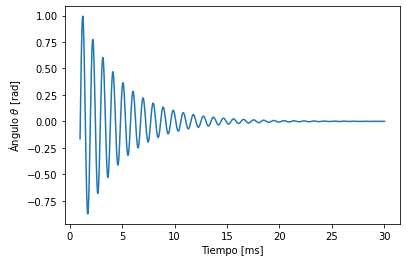

In [ ]:
plt.plot(t, f3(t))
plt.xlabel("Tiempo [ms]")
plt.ylabel("Ángulo $\\theta$ [rad]")